# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.6.0-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      /private/var/folders/yd/l72h9lmj3nddrynj68grd32w0000gn/T/pip-install-glbzpp7j/bokeh_d0fb786807924e5681b3e714d0d31410/versioneer.py:416: SyntaxWarning: invalid escape sequence '\s'
        LONG_VERSION_PY['git'] = '''
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 35, in <module>
        File "/private/var/folders/yd/l72h9lmj3nddrynj68grd32w0000gn/T/pip-install-glbzpp7j/bokeh_d0fb786807924e5681b3e714d0d31410/setup.py", line 118, in <module>
          version=get_version(),
                  ^^^^^^^^^^^^^
        File "/private/var/folders/yd/l72h9lmj3nddrynj68grd32w0000gn/T/pip-install-glbzpp7j/bokeh_d0fb78680792

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: /root: Read-only file system
touch: /root/.kaggle/kaggle.json: No such file or directory
chmod: /root/.kaggle/kaggle.json: No such file or directory


In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "matiwosbirbo"
kaggle_key = "d0626ea81aedb74336e0dabcd34f51ab"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:

    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
!pip install kaggle
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

Traceback (most recent call last):
  File "/Users/matiwosbirbo/miniforge3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/matiwosbirbo/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# test.describe()

In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train = train.drop(columns=["casual", "registered"])

In [ ]:
predictor = TabularPredictor(label='count', eval_metric='rmse',path="autogluon_models").fit(train, time_limit=600, presets='best_quality')
# predictor.leaderboard(silent=True)
# predictor

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:52:00 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T6031
CPU Count:          14
Memory Avail:       10.56 GB / 36.00 GB (29.3%)
Disk Space Avail:   1036.95 GB / 1858.19 GB (55.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data

In [ ]:
# test_predictions = predictor.predict(test)

# test_predictions = test_predictions.clip(lower=0)  # Ensure no negative predictions

# submission['count'] = test_predictions

# submission.to_csv('submission.csv', index=False)
# print("Submission file created successfully!")

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:

predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-49.011281,root_mean_squared_error,1.495409,392.536403,0.000449,0.041850,3,True,21
1,NeuralNetTorch_r79_BAG_L2,-50.042623,root_mean_squared_error,0.862287,338.910629,0.066876,57.868178,2,True,19
2,NeuralNetFastAI_BAG_L2,-51.871627,root_mean_squared_error,0.860049,286.248817,0.064638,5.206367,2,True,16
3,RandomForestMSE_BAG_L2,-53.178271,root_mean_squared_error,1.049340,284.416171,0.253929,3.373720,2,True,13
4,NeuralNetFastAI_r191_BAG_L2,-54.058623,root_mean_squared_error,0.910103,290.734330,0.114692,9.691879,2,True,20
5,ExtraTreesMSE_BAG_L2,-54.067233,root_mean_squared_error,1.050019,281.811831,0.254608,0.769381,2,True,15
6,NeuralNetTorch_BAG_L2,-54.530843,root_mean_squared_error,0.854909,325.276907,0.059498,44.234457,2,True,17
7,CatBoost_BAG_L2,-55.798365,root_mean_squared_error,0.804310,288.570378,0.008898,7.527927,2,True,14
8,CatBoost_r177_BAG_L2,-55.939034,root_mean_squared_error,0.804123,286.545973,0.008712,5.503523,2,True,18
9,KNeighborsDist_BAG_L1,-84.146423,root_mean_squared_error,0.014997,0.005036,0.014997,0.005036,1,True,2


In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -49.011281  root_mean_squared_error       1.495409  392.536403                0.000449           0.041850            3       True         21
1     NeuralNetTorch_r79_BAG_L2  -50.042623  root_mean_squared_error       0.862287  338.910629                0.066876          57.868178            2       True         19
2        NeuralNetFastAI_BAG_L2  -51.871627  root_mean_squared_error       0.860049  286.248817                0.064638           5.206367            2       True         16
3        RandomForestMSE_BAG_L2  -53.178271  root_mean_squared_error       1.049340  284.416171                0.253929           3.373720            2       True         13
4   NeuralNetFastAI_r191_BAG_L2  -54.058623  root_mean_squared_error

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L2':

### Create predictions from test dataset

In [ ]:
# Generate prediction for the test dataset
predictions = predictor.predict(test)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
print(predictions.describe())

count    6493.000000
mean       97.787849
std        89.009628
min         3.056494
25%        16.434929
50%        62.305466
75%       167.819534
max       351.066040
Name: count, dtype: float64


In [ ]:
# How many negative values do we have?
predictions = predictions.clip(lower=0)  # Ensure no negative predictions

# Display the first few predictions to verify
print(predictions.head())

0    26.975462
1    42.478622
2    48.359787
3    51.487431
4    53.601166
Name: count, dtype: float32


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Traceback (most recent call last):
  File "/Users/matiwosbirbo/miniforge3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/matiwosbirbo/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/Users/matiwosbirbo/miniforge3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/Users/matiwosbirbo/miniforge3/lib/python3.12/site-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/matiwosbirbo/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

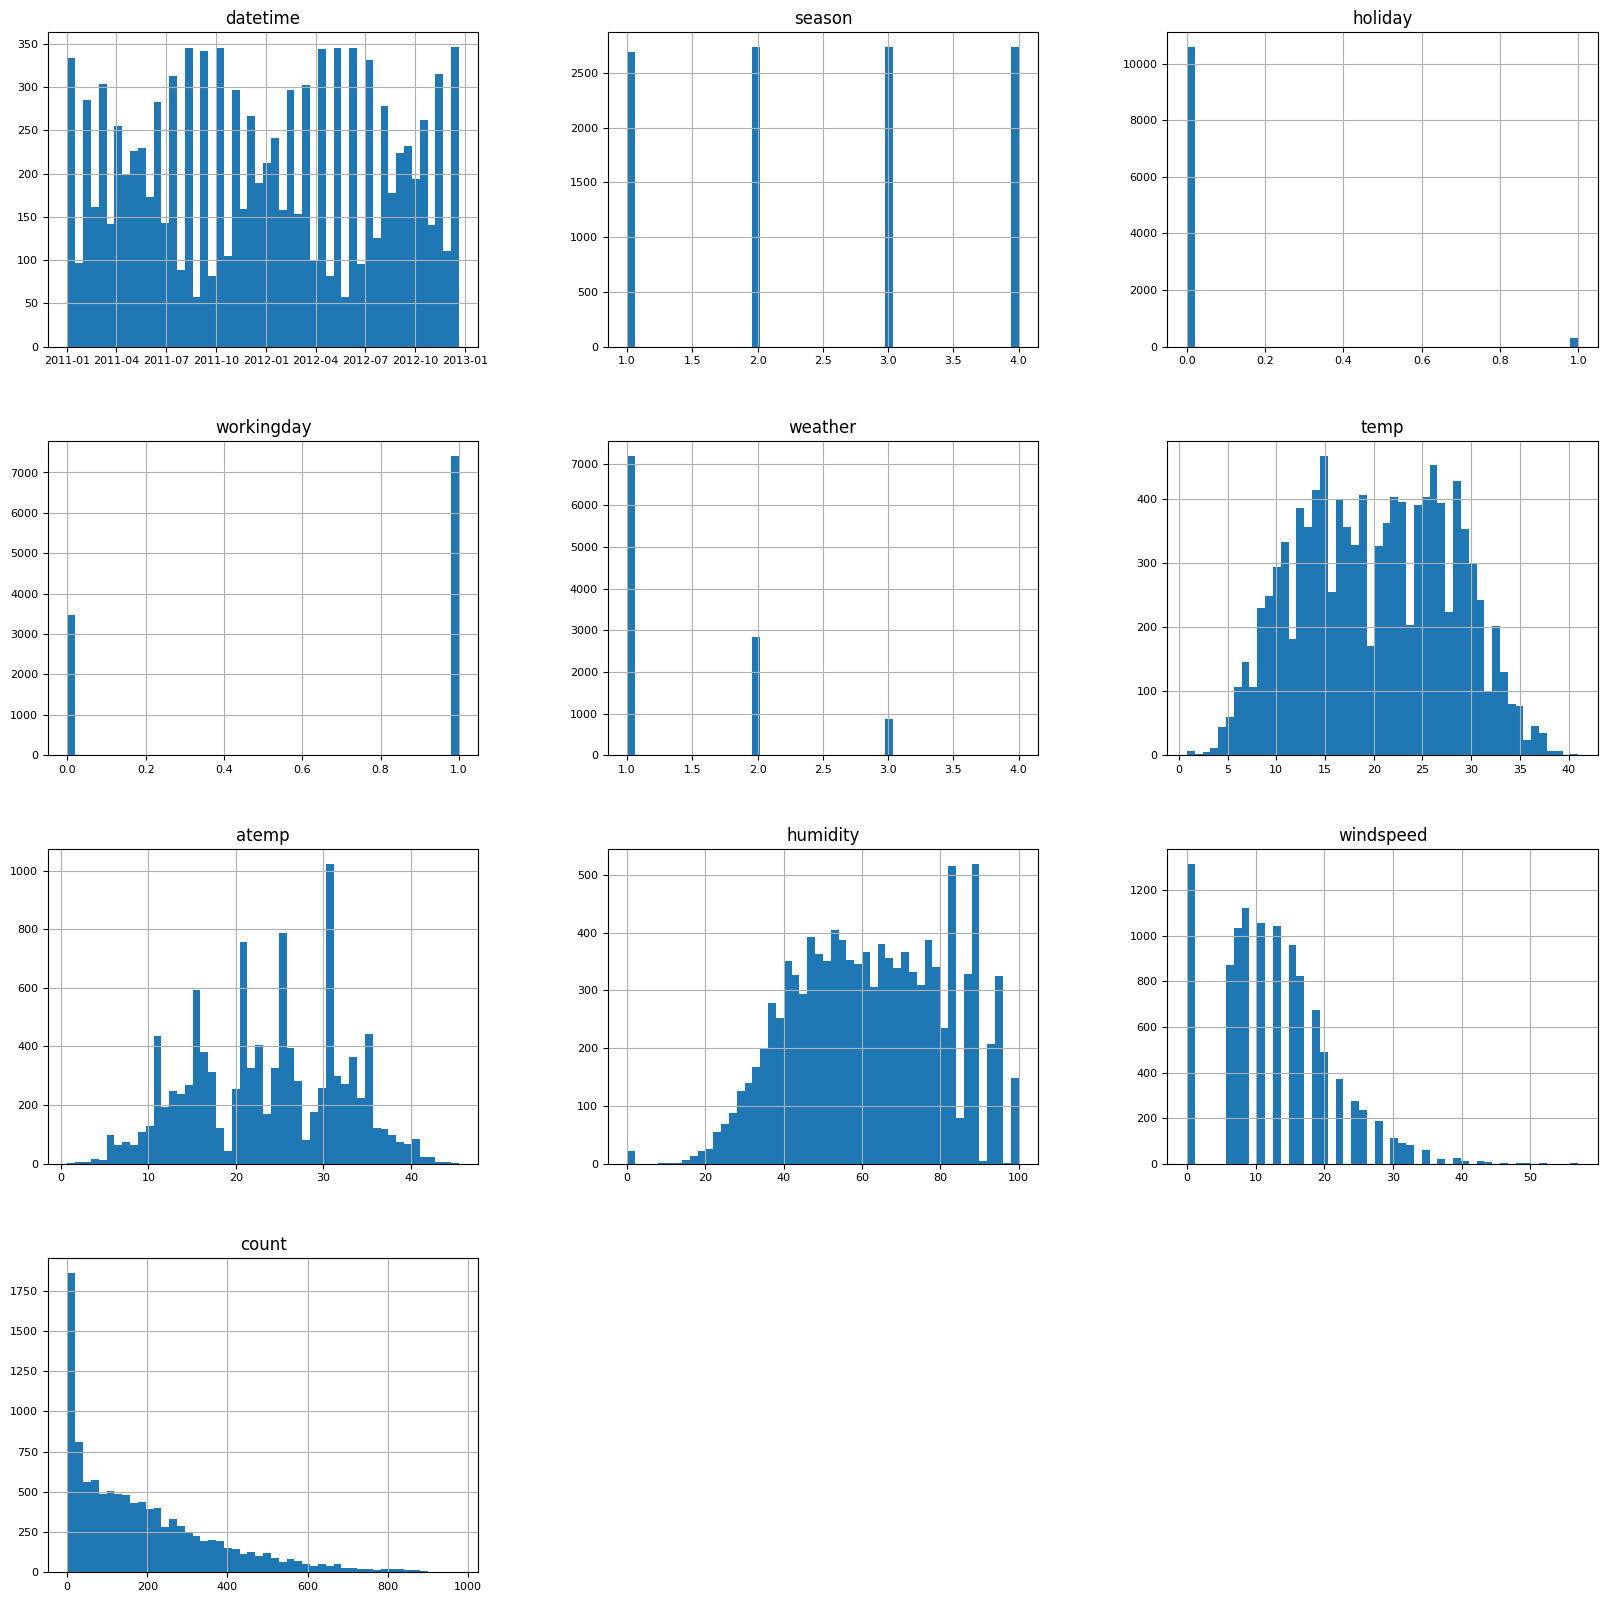

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month

test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# train["season"] = ?
# train["weather"] = ?
# test["season"] = ?
# test["weather"] = ?

for col in['season', 'holiday', 'workingday', 'weather', 'hour', 'day', 'month']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

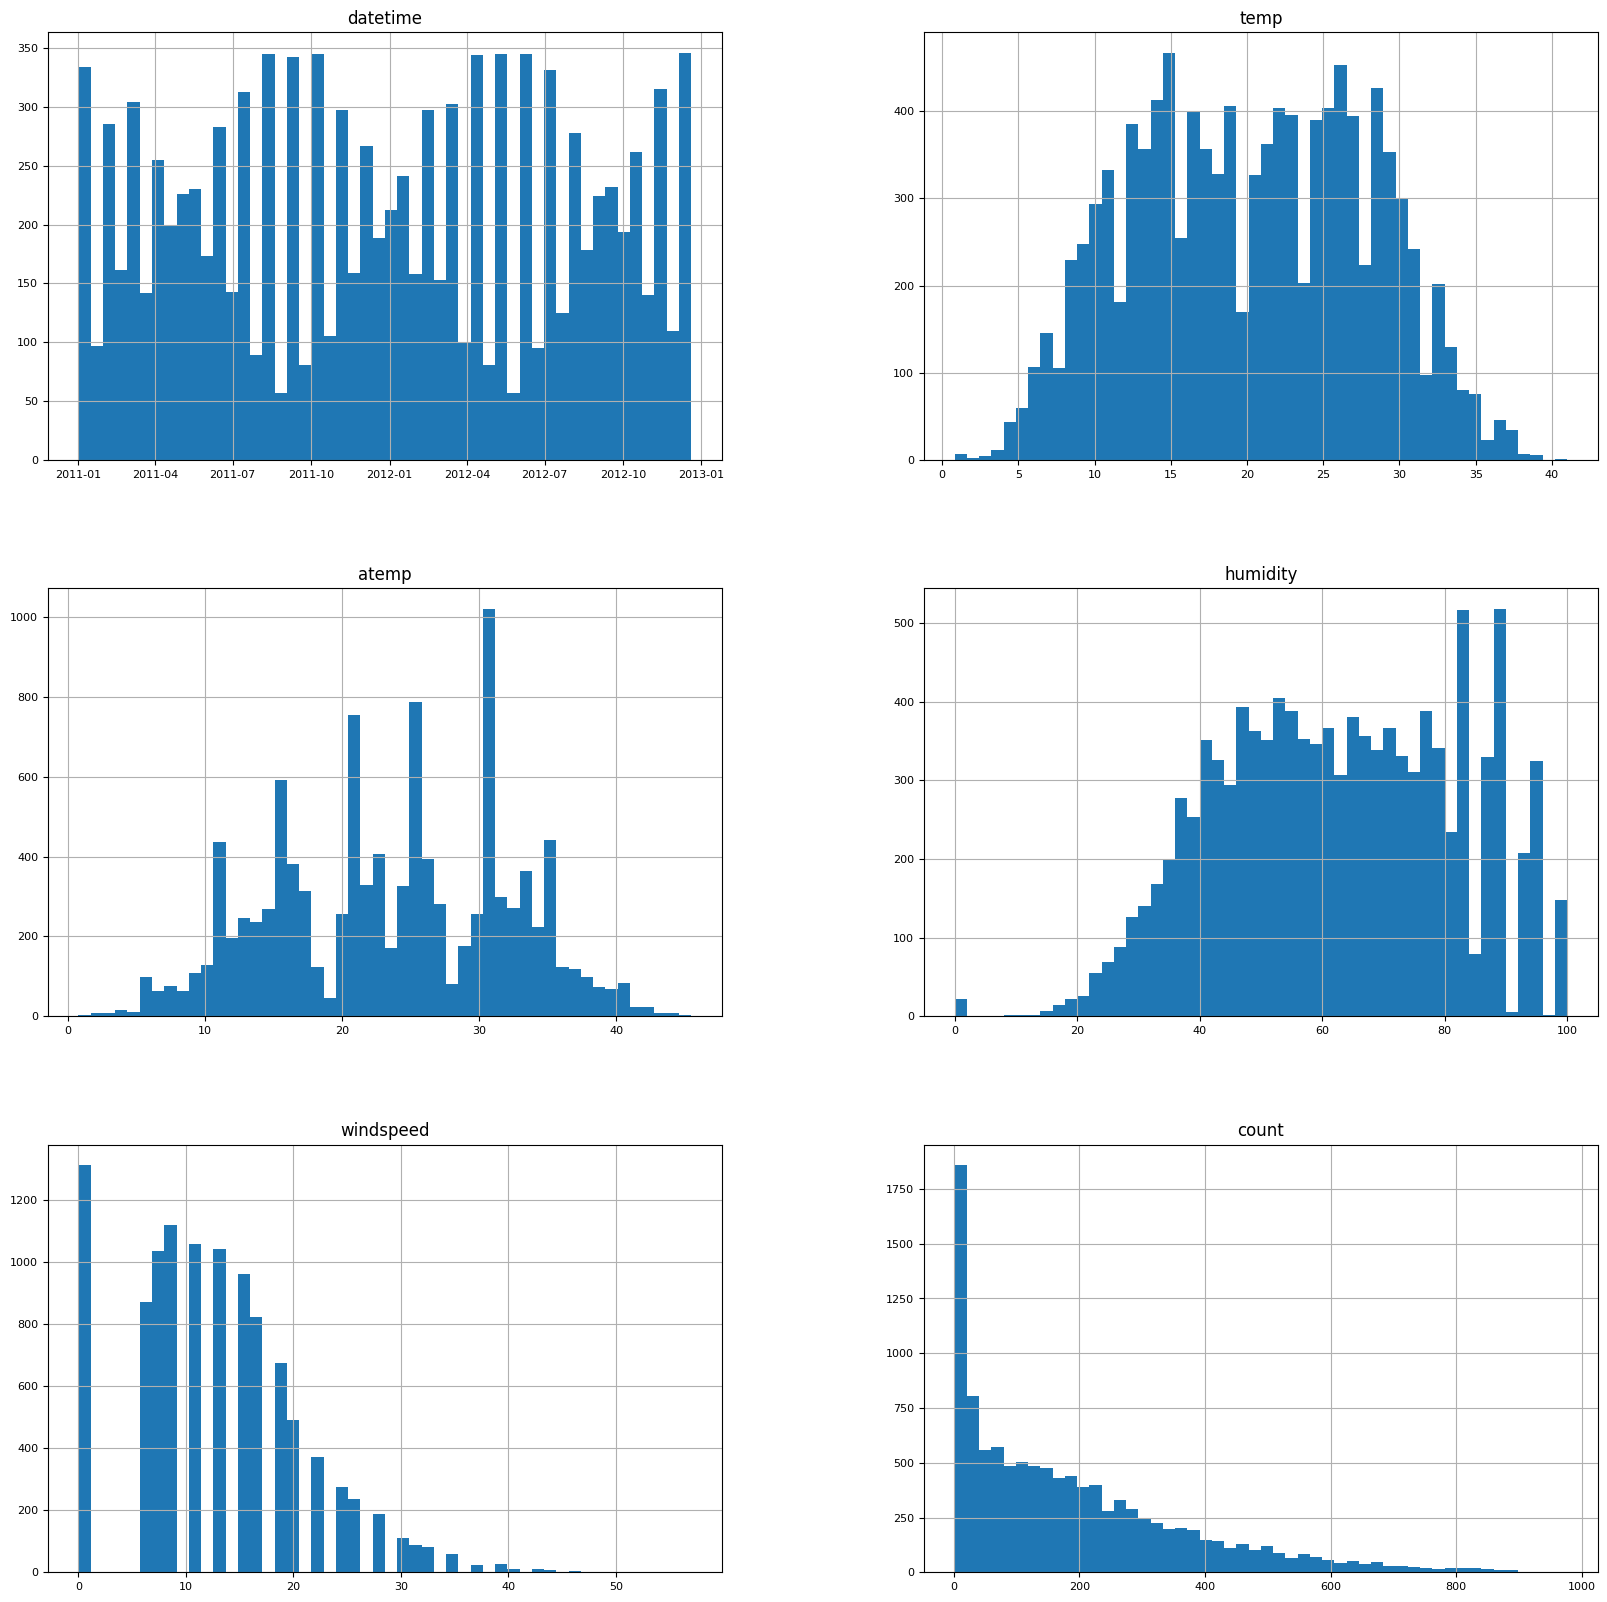

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# Drop leakage columns again
# train_featured = train.drop(columns=["casual", "registered"])

# Fit the model again with the new features
predictor_new_features = TabularPredictor(label='count', eval_metric='rmse', path='autogluon_models_v2').fit(
    train,
    time_limit= 600,
    presets='best_quality'
)
# Show the leaderboard of the new model
predictor_new_features.leaderboard(silent=True)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:52:00 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T6031
CPU Count:          14
Memory Avail:       8.73 GB / 36.00 GB (24.3%)
Disk Space Avail:   1035.64 GB / 1858.19 GB (55.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data.

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-27.064924,root_mean_squared_error,1.170511,330.668293,0.000180,0.016500,3,True,19
1,NeuralNetTorch_r79_BAG_L2,-27.310647,root_mean_squared_error,1.080903,302.996611,0.084435,31.153764,2,True,18
2,NeuralNetFastAI_BAG_L2,-28.359598,root_mean_squared_error,1.066776,276.849640,0.070308,5.006793,2,True,15
3,CatBoost_r177_BAG_L2,-29.938084,root_mean_squared_error,1.015588,294.491237,0.019120,22.648390,2,True,17
4,CatBoost_BAG_L2,-29.947592,root_mean_squared_error,1.018140,324.176367,0.021672,52.333520,2,True,13
5,RandomForestMSE_BAG_L2,-31.148490,root_mean_squared_error,1.259817,274.582008,0.263349,2.739161,2,True,12
6,ExtraTreesMSE_BAG_L2,-31.159512,root_mean_squared_error,1.250387,272.555572,0.253919,0.712725,2,True,14
7,WeightedEnsemble_L2,-31.279277,root_mean_squared_error,0.648829,264.778176,0.000379,0.018089,2,True,11
8,NeuralNetTorch_BAG_L2,-31.880042,root_mean_squared_error,1.070747,282.118149,0.074280,10.275302,2,True,16
9,NeuralNetTorch_r79_BAG_L1,-33.313866,root_mean_squared_error,0.056564,42.571254,0.056564,42.571254,1,True,9


In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -27.064924  root_mean_squared_error       1.170511  330.668293                0.000180           0.016500            3       True         19
1     NeuralNetTorch_r79_BAG_L2  -27.310647  root_mean_squared_error       1.080903  302.996611                0.084435          31.153764            2       True         18
2        NeuralNetFastAI_BAG_L2  -28.359598  root_mean_squared_error       1.066776  276.849640                0.070308           5.006793            2       True         15
3          CatBoost_r177_BAG_L2  -29.938084  root_mean_squared_error       1.015588  294.491237                0.019120          22.648390            2       True         17
4               CatBoost_BAG_L2  -29.947592  root_mean_squared_error

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'CatBoos

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = predictions_new_features.clip(lower=0)  # Ensure no negative predictions
predictions_new_features.head()

0    18.191792
1    11.380492
2     9.734320
3     8.152840
4     6.728096
Name: count, dtype: float32

In [ ]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='rmse', path='autogluon_models_v3').fit(
    train,
    time_limit= 600,
    presets='best_quality',
    hyperparameters='default'  # Use 'experimental' to allow for more complex models)
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:52:00 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T6031
CPU Count:          14
Memory Avail:       9.55 GB / 36.00 GB (26.5%)
Disk Space Avail:   1035.56 GB / 1858.19 GB (55.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data.

2025-06-08 21:13:14,581	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-06-08 21:13:14,582	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-06-08 21:13:14,583	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-06-08 21:13:14,585	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-06-08 21:13:14,588	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UN

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -28.387975  root_mean_squared_error       0.799925  222.627115                0.000507           0.022545            3       True         14
1   NeuralNetFastAI_BAG_L2  -28.565931  root_mean_squared_error       0.774480  162.222639                0.065861           4.929326            2       True         12
2          CatBoost_BAG_L2  -30.130274  root_mean_squared_error       0.733557  217.675244                0.024938          60.381931            2       True         10
3     ExtraTreesMSE_BAG_L2  -31.710108  root_mean_squared_error       0.970075  157.936514                0.261456           0.643201            2       True         11
4   RandomForestMSE_BAG_L2  -31.899091  root_mean_squared_error       0.966076  159.439665   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.58817625927213),
  'KNeighborsDist_BAG_L1': np.float64(-84.14642264302962),
  'RandomForestMSE_BAG_L1': 

In [ ]:
# Remember to set all negative values to zero
test_predictions_new_features = predictor_new_features.predict(test)
test_predictions_new_features = test_predictions_new_features.clip(lower=0)  # Ensure no negative predictions
test_predictions_new_features.head()

0    18.191792
1    11.380492
2     9.734320
3     8.152840
4     6.728096
Name: count, dtype: float32

In [ ]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = test_predictions_new_features
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})